In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('SHG_Booking_Data.xlsx')
print('Data frame read correctly')

Data frame read correctly


In [3]:
plt.style.use('seaborn-v0_8-talk')

In [4]:
df.shape

(119390, 17)

In [5]:
df.columns

Index(['Booking ID', 'Hotel', 'Booking Date', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

In [7]:
df.describe()

,Booking ID,Booking Date,Arrival Date,Lead Time,Nights,Guests,Avg Daily Rate,Status Update,Cancelled (0/1),Revenue,Revenue Loss
count,119390.000000,119390,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000
mean,59695.500000,2016-05-16 16:23:19.353379840,2016-08-28 16:39:45.727447808,104.011416,3.427900,1.968239,101.831122,2016-07-30 00:24:47.883407104,0.370416,247.931966,-109.916242
min,1.000000,2013-06-24 00:00:00,2015-07-01 00:00:00,0.000000,0.000000,0.000000,-6.380000,2014-10-17 00:00:00,0.000000,-63.800000,-6300.000000
25%,29848.250000,2015-11-28 00:00:00,2016-03-13 00:00:00,18.000000,2.000000,2.000000,69.290000,2016-02-01 00:00:00,0.000000,0.000000,0.000000
50%,59695.500000,2016-05-04 00:00:00,2016-09-06 00:00:00,69.000000,3.000000,2.000000,94.575000,2016-08-07 00:00:00,0.000000,176.000000,0.000000
75%,89542.750000,2016-12-09 00:00:00,2017-03-18 00:00:00,160.000000,4.000000,2.000000,126.000000,2017-02-08 00:00:00,1.000000,342.977500,0.000000
max,119390.000000,2017-08-31 00:00:00,2017-08-31 00:00:00,737.000000,69.000000,55.000000,5400.000000,2017-09-14 00:00:00,1.000000,7590.000000,0.000000
std,34465.068657,NaN,NaN,106.863097,2.557439,0.722394,50.535790,NaN,0.482918,300.921393,277.102641


In [8]:
print(f'duplicates: {df.duplicated().sum()}')

duplicates: 0


In [9]:
print(f'Valores nulos: \n{df.isna().sum()}')

Valores nulos: 
Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64


In [10]:
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [11]:
df.tail()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
119385,119386,City,2017-08-07,2017-08-30,23,7,2,Offline Travel Agent,Transient,Belgium,No Deposit,96.14,Check-Out,2017-09-06,0,672.98,0.0
119386,119387,City,2017-05-21,2017-08-31,102,7,3,Online Travel Agent,Transient,France,No Deposit,225.43,Check-Out,2017-09-07,0,1578.01,0.0
119387,119388,City,2017-07-28,2017-08-31,34,7,2,Online Travel Agent,Transient,Germany,No Deposit,157.71,Check-Out,2017-09-07,0,1103.97,0.0
119388,119389,City,2017-05-14,2017-08-31,109,7,2,Online Travel Agent,Transient,United Kingdom,No Deposit,104.40,Check-Out,2017-09-07,0,730.80,0.0
119389,119390,City,2017-02-05,2017-08-29,205,9,2,Online Travel Agent,Transient,Germany,No Deposit,151.20,Check-Out,2017-09-07,0,1360.80,0.0


In [12]:
df['Booking Month'] = df['Booking Date'].dt.month
df

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Booking Month
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.00,Check-Out,2015-07-01,0,0.00,0.0,7
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.00,Check-Out,2015-07-01,0,0.00,0.0,6
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.00,Check-Out,2015-07-02,0,75.00,0.0,6
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.00,Check-Out,2015-07-02,0,75.00,0.0,6
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.00,Check-Out,2015-07-03,0,196.00,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119386,City,2017-08-07,2017-08-30,23,7,2,Offline Travel Agent,Transient,Belgium,No Deposit,96.14,Check-Out,2017-09-06,0,672.98,0.0,8
119386,119387,City,2017-05-21,2017-08-31,102,7,3,Online Travel Agent,Transient,France,No Deposit,225.43,Check-Out,2017-09-07,0,1578.01,0.0,5
119387,119388,City,2017-07-28,2017-08-31,34,7,2,Online Travel Agent,Transient,Germany,No Deposit,157.71,Check-Out,2017-09-07,0,1103.97,0.0,7
119388,119389,City,2017-05-14,2017-08-31,109,7,2,Online Travel Agent,Transient,United Kingdom,No Deposit,104.40,Check-Out,2017-09-07,0,730.80,0.0,5


In [13]:
df = df[['Booking ID', 'Hotel', 'Booking Date', 'Booking Month', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss']]
df.head()

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,7,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,6,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,6,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,6,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,6,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [14]:
dist_trends = df.groupby(['Distribution Channel', 'Booking Month'], as_index=False)['Booking ID'].count()
dist_trends = dist_trends.set_index('Booking Month')
dist_trends['Distribution Channel'].unique()

array(['Corporate', 'Direct', 'Offline Travel Agent',
       'Online Travel Agent', 'Undefined'], dtype=object)

In [15]:
dist_trends.head()

,Distribution Channel,Booking ID
Booking Month,,
1,Corporate,773
2,Corporate,691
3,Corporate,558
4,Corporate,613
5,Corporate,590


In [16]:
dist_trends.shape

(50, 2)

In [17]:
dist_trends.tail()

,Distribution Channel,Booking ID
Booking Month,,
10,Online Travel Agent,7382
11,Online Travel Agent,5465
12,Online Travel Agent,5557
3,Undefined,1
8,Undefined,4


In [18]:
dist_trends= dist_trends.reset_index()

In [19]:
dist_trends.drop(index=[48, 49], inplace=True)

In [20]:
dist_trends.index

RangeIndex(start=0, stop=48, step=1)

In [21]:
dist_trends['Distribution Channel'].value_counts()

Distribution Channel
Corporate               12
Direct                  12
Offline Travel Agent    12
Online Travel Agent     12
Name: count, dtype: int64

In [22]:
dist_trends.sort_values(by='Booking ID', ascending=False)

,Booking Month,Distribution Channel,Booking ID
36,1,Online Travel Agent,10175
37,2,Online Travel Agent,8632
45,10,Online Travel Agent,7382
42,7,Online Travel Agent,6908
38,3,Online Travel Agent,6205
47,12,Online Travel Agent,5557
46,11,Online Travel Agent,5465
39,4,Online Travel Agent,5207
43,8,Online Travel Agent,5144
40,5,Online Travel Agent,4815


In [23]:
dist_trends.set_index('Booking Month', inplace=True)

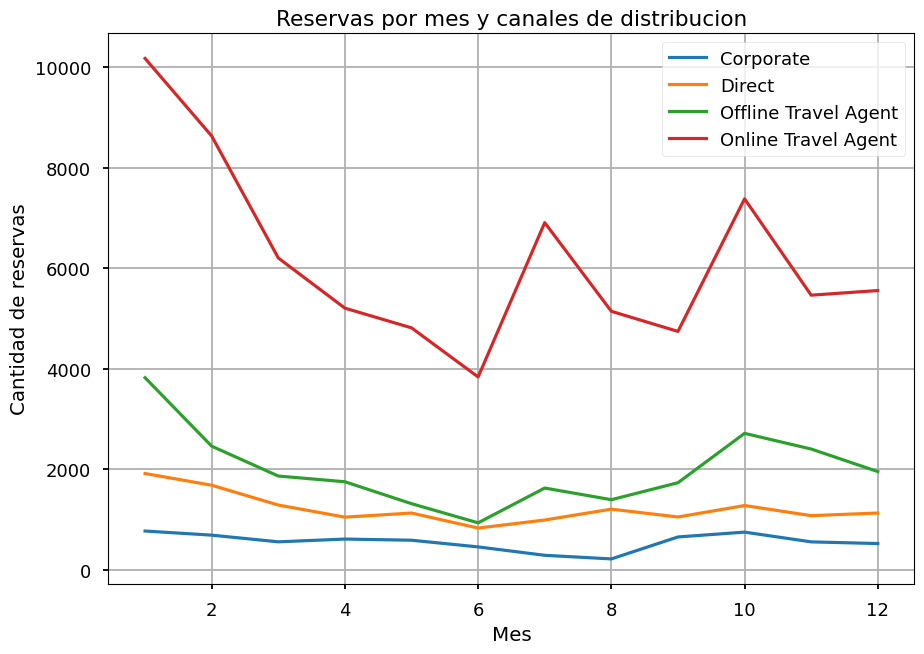

In [24]:

book_count= dist_trends.groupby('Distribution Channel')['Booking ID']
book_count.plot(kind='line', xlabel = 'Mes', ylabel= 'Cantidad de reservas', 
                title= 'Reservas por mes y canales de distribucion',
                legend= 'Distribution Channel',
                grid= True)


plt.show()

### El mes donde realizan mas reservas es enero, seguido de octubre y julio. Donde predominan notablemente las reservas hechas por agentes de viajes de manera online.

In [25]:
df.head()

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,7,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,6,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,6,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,6,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,6,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [26]:
lead_variation= df.groupby('Distribution Channel', as_index=False)['Lead Time'].mean()
lead_variation

,Distribution Channel,Lead Time
0,Corporate,44.910289
1,Direct,57.829362
2,Offline Travel Agent,135.585261
3,Online Travel Agent,108.248798
4,Undefined,23.000000


<Figure size 800x600 with 0 Axes>

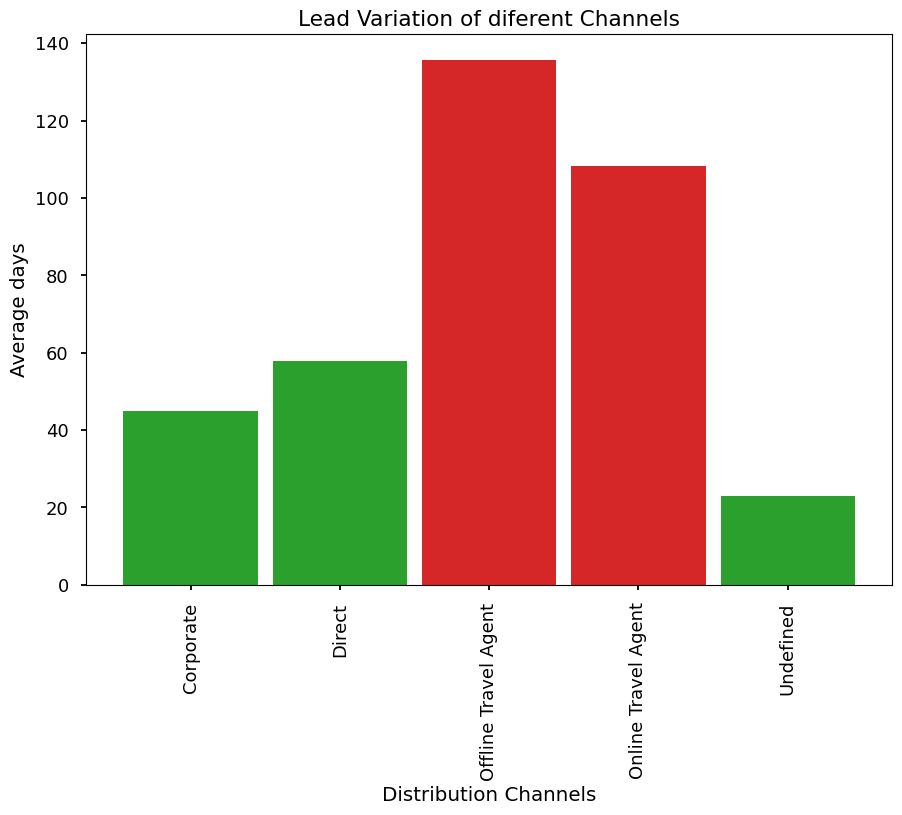

In [27]:
colores = ['tab:green', 'tab:green', 'tab:red', 'tab:red', 'tab:green']
plt.figure(figsize=(8,6))
lead_variation.plot(kind='bar', x='Distribution Channel', y='Lead Time',
                    title='Lead Variation of diferent Channels',
                    xlabel='Distribution Channels', ylabel='Average days', width= 0.9,
                    color=colores, legend=False
                    )


plt.show()

In [28]:
df.head(2)

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,7,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,6,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0


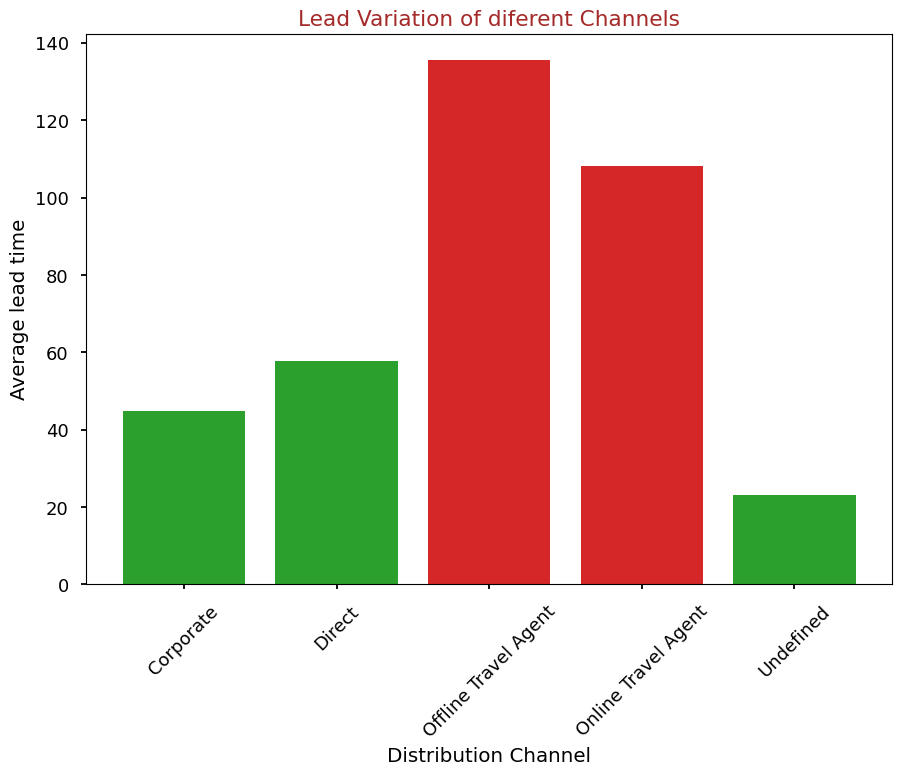

In [29]:
fig, ax = plt.subplots()

colores = ['tab:green', 'tab:green', 'tab:red', 'tab:red', 'tab:green']
ax.bar(lead_variation['Distribution Channel'], lead_variation['Lead Time'], 
       color=colores,
       width=0.8)

ax.set_ylabel('Average lead time')
ax.set_title('Lead Variation of diferent Channels', color= 'brown')
ax.set_xlabel('Distribution Channel')

plt.xticks(rotation=45)


plt.show()

### Acá apreciamos que los canales con más dias entre la reserva y el dia de llegada son relacionados con agentes de viaje

¿Which distribution channels contribute the most to bookings?

In [30]:
df.head(2)

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,7,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,6,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0


In [31]:
top_contribution = df.groupby('Distribution Channel', as_index=False)['Revenue'].sum()
top_contribution['Revenue']= top_contribution['Revenue'] / 1000
top_contribution

,Distribution Channel,Revenue
0,Corporate,918.49477
1,Direct,4432.81999
2,Offline Travel Agent,6993.59567
3,Online Travel Agent,17255.12351
4,Undefined,0.56350


<Figure size 800x600 with 0 Axes>

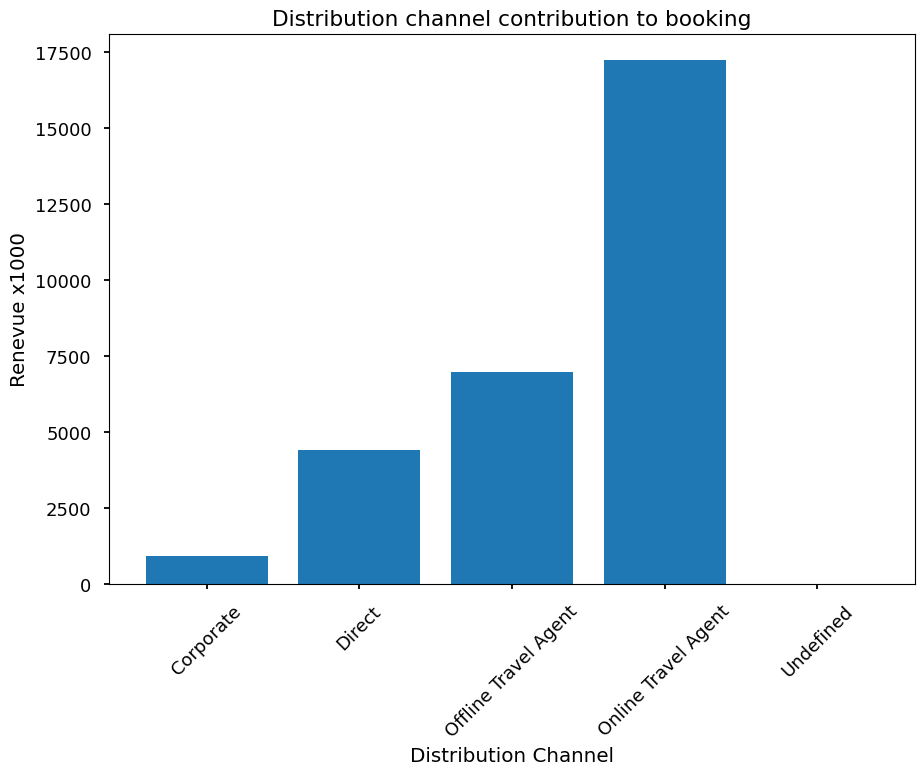

In [32]:
plt.figure(figsize=(8,6))
x, y = top_contribution['Distribution Channel'], top_contribution['Revenue']

fig, ax = plt.subplots()
ax.bar(x, y)

ax.set_ylabel('Renevue x1000')
ax.set_xlabel('Distribution Channel')
ax.set_title('Distribution channel contribution to booking')
plt.xticks(rotation=45)

plt.show()

### Online travel agent is the distribution channel who contribute the most to booking

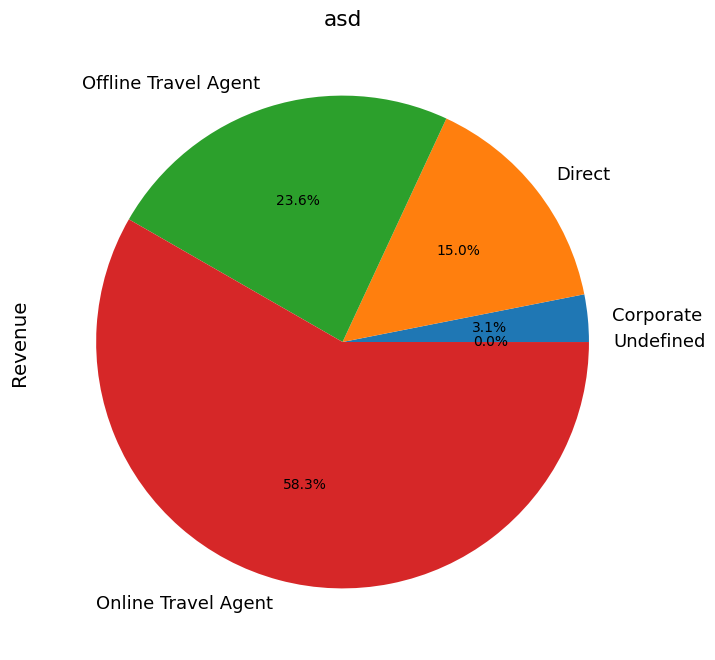

In [33]:

top_contribution = df.groupby('Distribution Channel')['Revenue'].sum()
top_contribution.plot(kind='pie', 
                      figsize=(10,8),
                      autopct = '%1.1f%%',
                      title='asd')
                      

plt.title='asd'
plt.show()

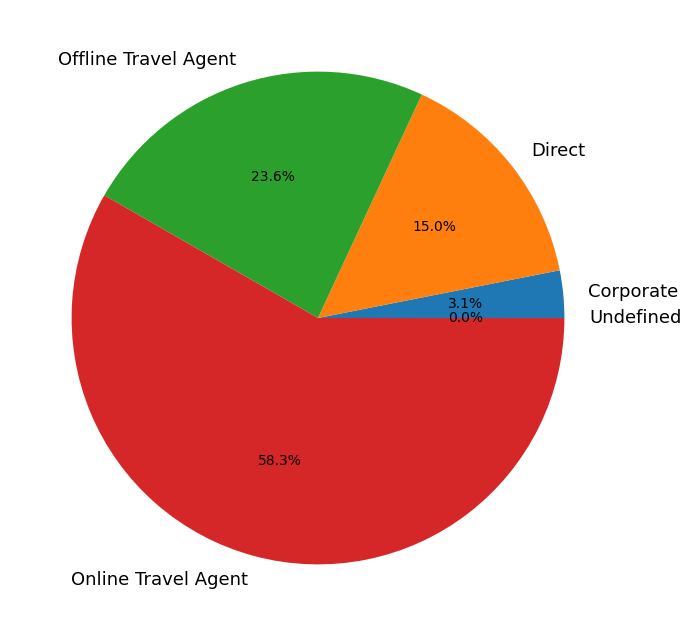

In [34]:
plt.figure(figsize=(10,8))

labels = top_contribution.index
sizes = top_contribution.values

plt.pie(sizes, labels=labels, autopct= '%1.1f%%', startangle=0)


plt.show()

## How does the average daily rate (ADR) differ across these channels?


In [35]:
df.head(2)

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,7,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,6,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0


In [36]:
adr_channels= df.groupby('Distribution Channel')['Avg Daily Rate'].mean()
adr_channels

Distribution Channel
Corporate                69.325204
Direct                  106.654983
Offline Travel Agent     87.145444
Online Travel Agent     108.567791
Undefined                46.240000
Name: Avg Daily Rate, dtype: float64

<Axes: title={'center': 'average daily rate across channels'}, xlabel='Distribution Channel', ylabel='average daily fare'>

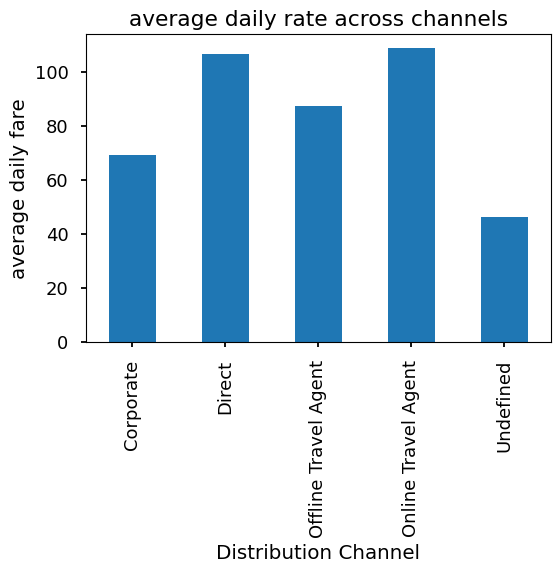

In [37]:
adr_channels.plot(kind='bar',figsize=(6,4),
                  title='average daily rate across channels', 
                  ylabel='average daily fare')

### Can we identify any patterns in the distribution of guests based on their country of origin, and how does this impact revenue?


In [38]:
df.head(2)

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,7,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,6,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0


In [39]:
no_cancelados= df[df['Cancelled (0/1)']== 0]
no_cancelados=no_cancelados.groupby('Country',as_index=False)['Guests'].mean()
no_cancelados= no_cancelados.sort_values(by='Guests', ascending=False)
no_cancelados=no_cancelados.head(15)
no_cancelados=no_cancelados.set_index('Country', drop=True)
no_cancelados

,Guests
Country,
Zambia,4.000000
Anguilla,4.000000
Djibouti,4.000000
Comoros,3.500000
Andorra,3.500000
East Timor,3.500000
Faroe Islands,3.000000
Botswana,3.000000
Nigeria,2.538462


<Axes: title={'center': 'top 15 promedio de huespedes por paises'}, xlabel='Country', ylabel='Huespedes'>

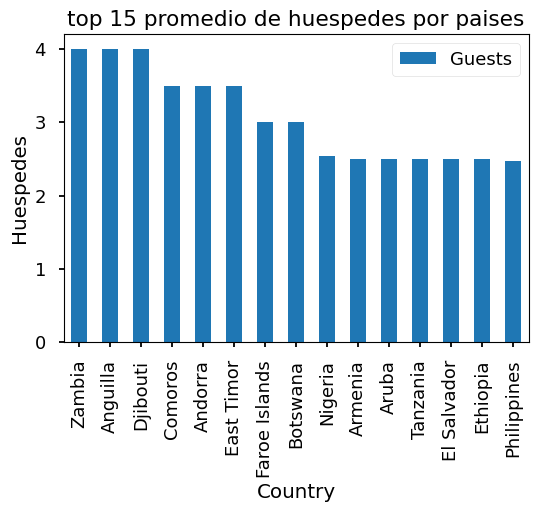

In [40]:
no_cancelados.plot(kind='bar', title='top 15 promedio de huespedes por paises', ylabel='Huespedes',
                   figsize=(6,4))

In [41]:
cancelados= df[df['Cancelled (0/1)']== 1]
cancelados=cancelados.groupby('Country',as_index=False)['Guests'].mean()
cancelados= cancelados.sort_values(by='Guests', ascending=False)
cancelados=cancelados.head(15)

In [42]:
cancelados

,Country,Guests
35,Fiji,4.000000
62,Kenya,3.000000
83,Nicaragua,3.000000
78,Montenegro,3.000000
75,Mayotte,3.000000
74,Mauritius,3.000000
44,Guadeloupe,3.000000
34,Faroe Islands,3.000000
28,Dominican Republic,2.875000
10,Bangladesh,2.777778


In [43]:
no_cancelados= df[df['Cancelled (0/1)']== 0]
no_cancelados= no_cancelados.groupby('Country', as_index=False)['Guests'].sum()
no_cancelados= no_cancelados.sort_values(by='Guests', ascending=False)
no_cancelados= no_cancelados.head(20)
no_cancelados

,Country,Guests
118,Portugal,37670
155,United Kingdom,19258
52,France,17299
138,Spain,13213
57,Germany,11659
71,Ireland,5102
73,Italy,4894
18,Belgium,3855
105,Netherlands,3374
156,United States,3212


<Axes: title={'center': 'Top 20 paises mas cantidad de huespedes (No canceladas)'}, xlabel='Paises', ylabel='Huespedes'>

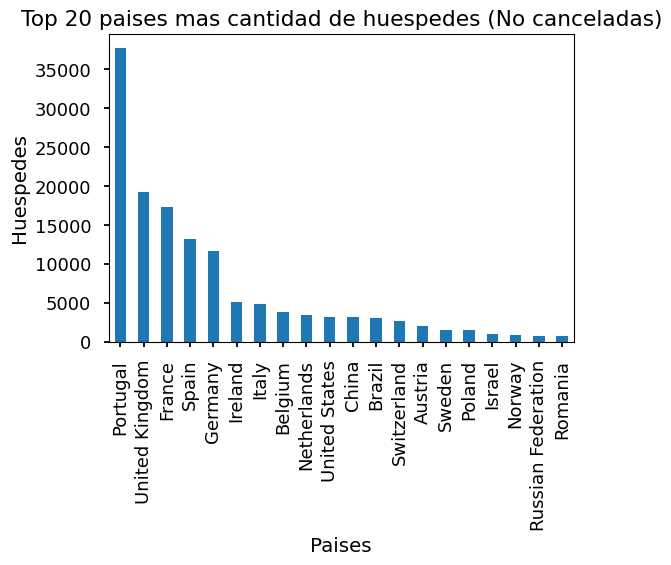

In [44]:
no_cancelados.plot(kind='bar', x='Country', figsize=(6,4),
                   title='Top 20 paises mas cantidad de huespedes (No canceladas)',
                   xlabel='Paises',
                   ylabel='Huespedes', 
                   legend=False)


In [45]:
df.corr(numeric_only=True)

,Booking ID,Booking Month,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Revenue,Revenue Loss
Booking ID,1.000000,-0.026321,0.006708,-0.210515,-0.023034,0.147357,-0.242238,0.082039,0.223770
Booking Month,-0.026321,1.000000,0.057579,-0.050618,-0.050794,-0.081864,0.050502,-0.054352,0.059363
Lead Time,0.006708,0.057579,1.000000,0.157167,0.072265,-0.063077,0.293123,0.045773,-0.055487
Nights,-0.210515,-0.050618,0.157167,1.000000,0.115463,0.067945,0.017779,0.496060,-0.368046
Guests,-0.023034,-0.050794,0.072265,0.115463,1.000000,0.368105,0.046522,0.155087,-0.181168
Avg Daily Rate,0.147357,-0.081864,-0.063077,0.067945,0.368105,1.000000,0.047557,0.363388,-0.291212
Cancelled (0/1),-0.242238,0.050502,0.293123,0.017779,0.046522,0.047557,1.000000,-0.424228,-0.517136
Revenue,0.082039,-0.054352,0.045773,0.496060,0.155087,0.363388,-0.424228,1.000000,0.326817
Revenue Loss,0.223770,0.059363,-0.055487,-0.368046,-0.181168,-0.291212,-0.517136,0.326817,1.000000


In [46]:
df.groupby('Country', as_index=False)['Guests'].mean()

,Country,Guests
0,Albania,1.833333
1,Algeria,1.737864
2,American Samoa,2.000000
3,Andorra,2.714286
4,Angola,1.801105
...,...,...
169,Venezuela,2.076923
170,Viet Nam,2.125000
171,Virgin Islands,2.000000
172,Zambia,3.000000


In [47]:
guest_by_countries= df.groupby('Country',as_index=False)[['Guests', 'Revenue']].mean()
guest_by_countries= guest_by_countries.sort_values(by='Guests', ascending=False).sort_values(by='Revenue', ascending=False)
guest_by_countries= guest_by_countries.head(10)
guest_by_countries


,Country,Guests,Revenue
5,Anguilla,4.000000,1060.000000
122,Palau,2.000000,954.030000
159,Togo,2.000000,892.250000
143,Sierra Leone,2.000000,850.010000
115,New Caledonia,2.000000,702.000000
103,Mauritania,2.000000,585.900000
67,Guinea-Bissau,1.222222,516.987778
112,Namibia,2.000000,486.440000
134,Rwanda,1.500000,482.370000
9,Aruba,2.500000,463.860000


<Axes: xlabel='Country'>

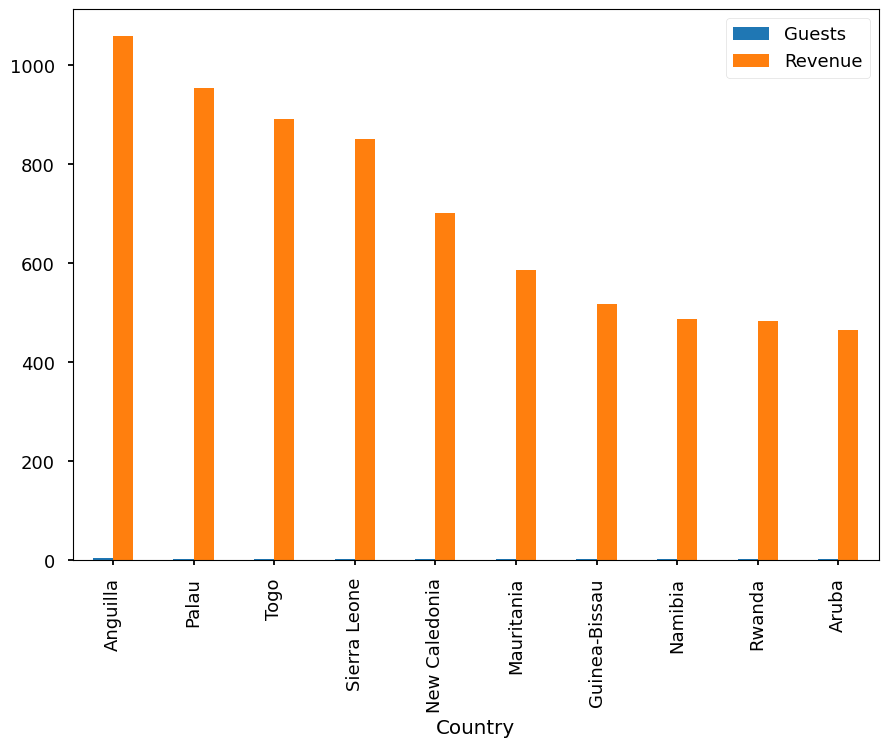

In [48]:
guest_by_countries.plot(kind='bar', x='Country')

In [49]:
df.head(2)

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,7,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,6,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0


<Axes: xlabel='Guests', ylabel='Revenue'>

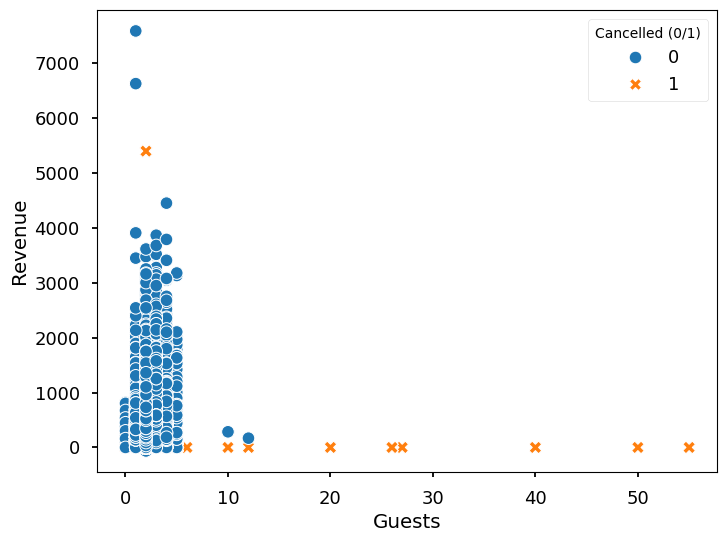

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Guests', y='Revenue', hue='Cancelled (0/1)', style='Cancelled (0/1)')


What factors are most strongly correlated with cancellations, and can we predict
potential cancellations based on certain variables?


In [51]:
canceled = df[df['Cancelled (0/1)'] == 1]
canceled.head()

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
8,9,Resort,2015-04-07,4,2015-07-01,85,3,2,Online Travel Agent,Transient,Portugal,No Deposit,82.0,Canceled,2015-05-06,1,0.0,-246.0
9,10,Resort,2015-04-17,4,2015-07-01,75,3,2,Offline Travel Agent,Transient,Portugal,No Deposit,105.5,Canceled,2015-04-22,1,0.0,-316.5
10,11,Resort,2015-06-08,6,2015-07-01,23,4,2,Online Travel Agent,Transient,Portugal,No Deposit,123.0,Canceled,2015-06-23,1,0.0,-492.0
27,28,Resort,2015-05-02,5,2015-07-01,60,7,2,Online Travel Agent,Transient,Portugal,No Deposit,107.0,Canceled,2015-05-11,1,0.0,-749.0
32,33,Resort,2015-03-27,3,2015-07-01,96,10,2,Direct,Transient,Portugal,No Deposit,108.3,Canceled,2015-05-29,1,0.0,-1083.0


In [52]:
df.corr(numeric_only=True)

,Booking ID,Booking Month,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Revenue,Revenue Loss
Booking ID,1.000000,-0.026321,0.006708,-0.210515,-0.023034,0.147357,-0.242238,0.082039,0.223770
Booking Month,-0.026321,1.000000,0.057579,-0.050618,-0.050794,-0.081864,0.050502,-0.054352,0.059363
Lead Time,0.006708,0.057579,1.000000,0.157167,0.072265,-0.063077,0.293123,0.045773,-0.055487
Nights,-0.210515,-0.050618,0.157167,1.000000,0.115463,0.067945,0.017779,0.496060,-0.368046
Guests,-0.023034,-0.050794,0.072265,0.115463,1.000000,0.368105,0.046522,0.155087,-0.181168
Avg Daily Rate,0.147357,-0.081864,-0.063077,0.067945,0.368105,1.000000,0.047557,0.363388,-0.291212
Cancelled (0/1),-0.242238,0.050502,0.293123,0.017779,0.046522,0.047557,1.000000,-0.424228,-0.517136
Revenue,0.082039,-0.054352,0.045773,0.496060,0.155087,0.363388,-0.424228,1.000000,0.326817
Revenue Loss,0.223770,0.059363,-0.055487,-0.368046,-0.181168,-0.291212,-0.517136,0.326817,1.000000


In [53]:
canceled.corr(numeric_only=True)

,Booking ID,Booking Month,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Revenue,Revenue Loss
Booking ID,1.000000,0.122502,0.149566,-0.283427,-0.098956,0.002140,NaN,0.163449,0.261122
Booking Month,0.122502,1.000000,0.087379,-0.070946,-0.053760,-0.126985,NaN,0.120416,0.161545
Lead Time,0.149566,0.087379,1.000000,-0.004263,0.024503,-0.204075,NaN,0.224327,0.166188
Nights,-0.283427,-0.070946,-0.004263,1.000000,0.098336,0.092105,NaN,0.003035,-0.698679
Guests,-0.098956,-0.053760,0.024503,0.098336,1.000000,0.261315,NaN,-0.150880,-0.271733
Avg Daily Rate,0.002140,-0.126985,-0.204075,0.092105,0.261315,1.000000,NaN,0.052869,-0.492011
Cancelled (0/1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,0.163449,0.120416,0.224327,0.003035,-0.150880,0.052869,NaN,1.000000,0.406506
Revenue Loss,0.261122,0.161545,0.166188,-0.698679,-0.271733,-0.492011,NaN,0.406506,1.000000


<Axes: xlabel='Nights', ylabel='Revenue'>

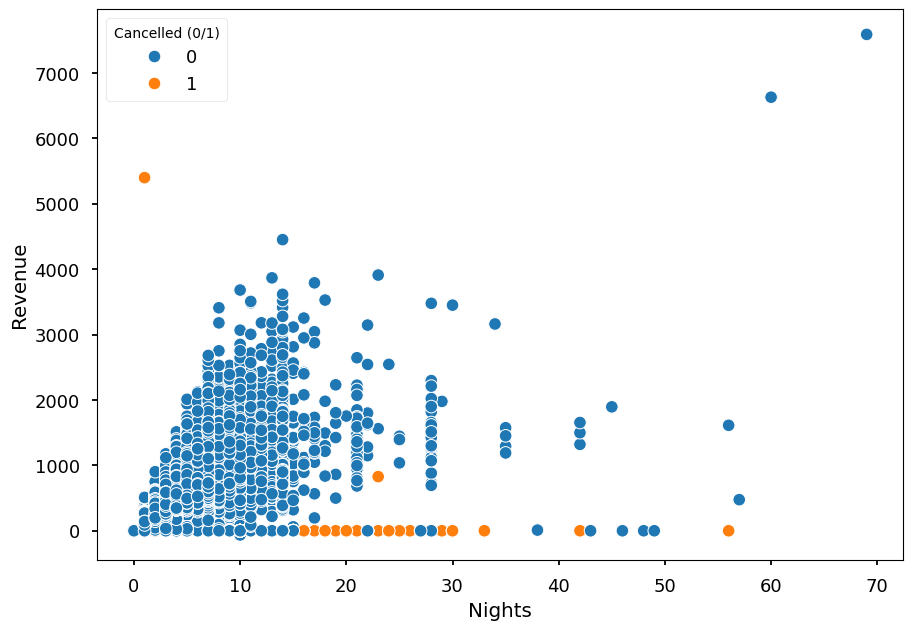

In [54]:
sns.scatterplot(data=df, x=df['Nights'], y=df['Revenue'], hue='Cancelled (0/1)')

In [55]:
df.head(2)

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,7,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,6,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0


<Axes: xlabel='Lead Time', ylabel='Count'>

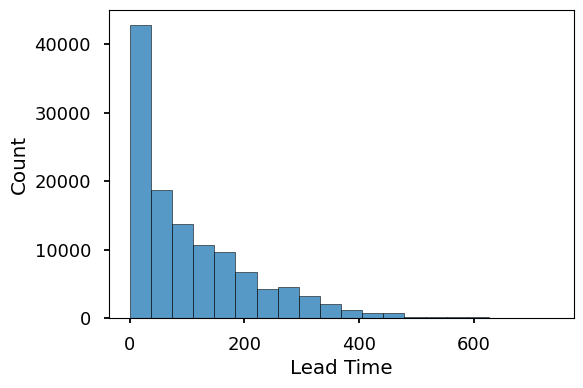

In [56]:
plt.figure(figsize=(6,4))
sns.histplot(df['Lead Time'], bins=20)

<Axes: ylabel='Count'>

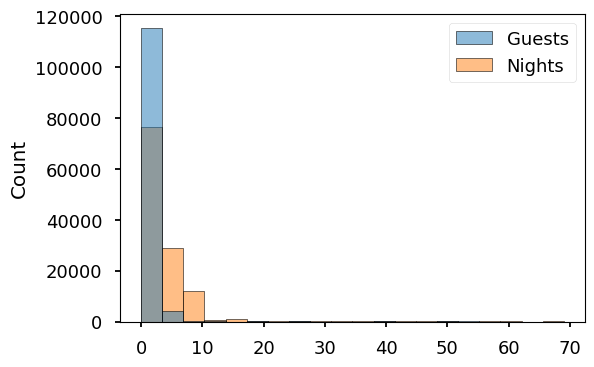

In [57]:
plt.figure(figsize=(6,4))
sns.histplot(df[['Guests', 'Nights']], bins=20)

<Axes: xlabel='Booking Month', ylabel='Count'>

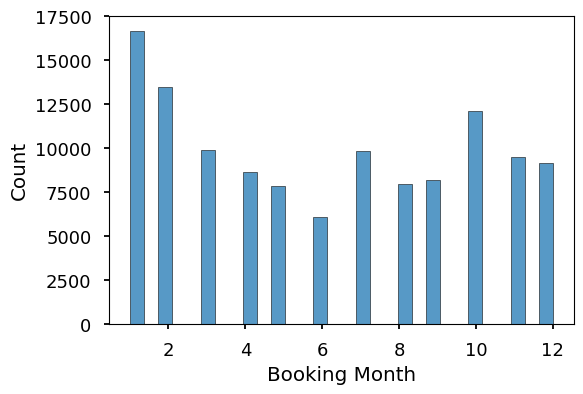

In [58]:
plt.figure(figsize=(6,4))
sns.histplot(df['Booking Month'], bins=30)

#### <span style="color: #0000FF;">**How does revenue loss from cancelation compare across diferent customer segments and distribution channels?**</span>

In [59]:
df.head(10)

,Booking ID,Hotel,Booking Date,Booking Month,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,7,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,6,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,6,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,6,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,6,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0
5,6,Resort,2015-06-17,6,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0
6,7,Resort,2015-07-01,7,2015-07-01,0,2,2,Direct,Transient,Portugal,No Deposit,107.0,Check-Out,2015-07-03,0,214.0,0.0
7,8,Resort,2015-06-22,6,2015-07-01,9,2,2,Direct,Transient,Portugal,No Deposit,103.0,Check-Out,2015-07-03,0,206.0,0.0
8,9,Resort,2015-04-07,4,2015-07-01,85,3,2,Online Travel Agent,Transient,Portugal,No Deposit,82.0,Canceled,2015-05-06,1,0.0,-246.0
9,10,Resort,2015-04-17,4,2015-07-01,75,3,2,Offline Travel Agent,Transient,Portugal,No Deposit,105.5,Canceled,2015-04-22,1,0.0,-316.5


In [68]:
customer_loss= canceled.groupby('Customer Type',as_index=False)['Revenue Loss'].sum()
customer_loss['Revenue Loss']= customer_loss['Revenue Loss'].apply(lambda x: abs(x))
customer_loss


,Customer Type,Revenue Loss
0,Contract,283888.62
1,Group,17325.19
2,Transient,11502290.03
3,Transient-Party,1319396.25


In [71]:
customer_loss

,Customer Type,Revenue Loss
0,Contract,283888.62
1,Group,17325.19
2,Transient,11502290.03
3,Transient-Party,1319396.25


In [75]:
customer_loss.set_index('Customer Type', inplace=True, drop=True)

In [78]:
customer_loss.index.name=None

<Figure size 1000x800 with 0 Axes>

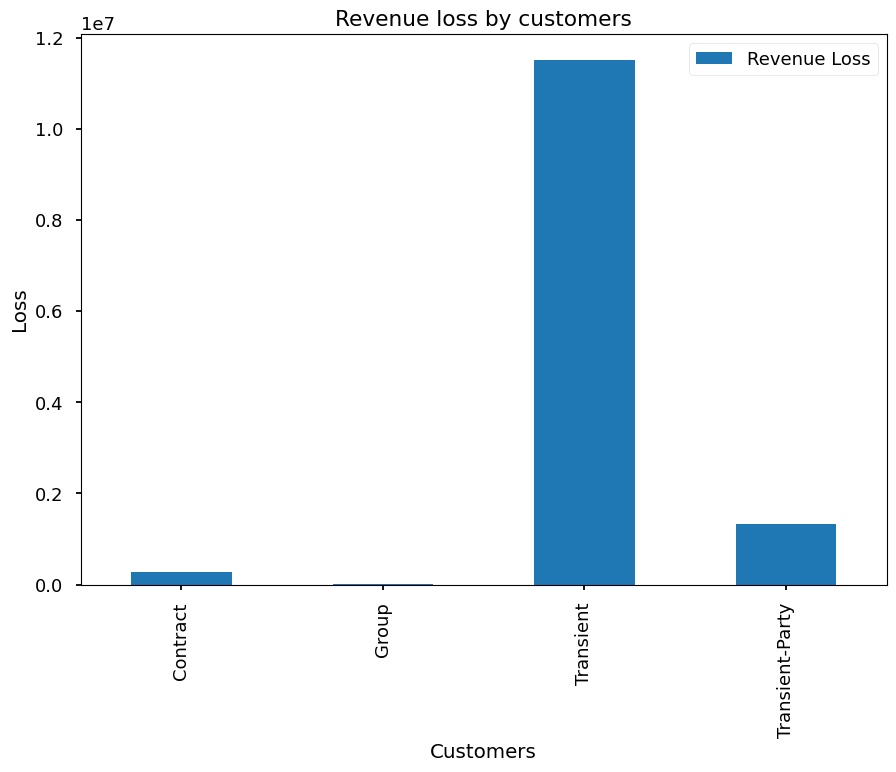

In [91]:
plt.figure(figsize=(10,8))
customer_loss.plot(kind='bar', title='Revenue loss by customers', ylabel='Loss', xlabel='Customers')
plt.show()